In [1]:
import pandas as pd

import oversampling_binary
import oversampling_multiclass
import resample
import features
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# CLASSIFICAZIONE MULTICLASSE

In [2]:
# Caricare il dataset e applicare lo split
csv_file_path = 'audio_features.csv'
X_train_imputed, X_val_imputed, X_test_imputed, y_train_encoded, y_val_encoded, y_test_encoded, subclass_encoder = oversampling_multiclass.split_dataset(csv_file_path)

In [3]:
# Stampare la distribuzione delle classi
print("Distribuzione delle classi nel set di addestramento:")
print(pd.Series(subclass_encoder.inverse_transform(y_train_encoded)).value_counts())

Distribuzione delle classi nel set di addestramento:
Tanker                              9181
Passengership                       8847
Tug                                 8539
Cargo                               7705
Vessel                               282
Seismic airguns surveys               18
Seal bomb                             17
Sonar                                 16
Echosounder                            7
Underwater Communication Signals       6
Scuba divers                           4
Seafloor fossil fuel processing        4
Acoustic release                       3
Acoustic Harassment Devices            2
Explosion                              2
Fishing pinger                         2
Name: count, dtype: int64


In [4]:
print("\nContenuto del set di addestramento prima di SMOTE:")
train_df_before_smote = pd.DataFrame(X_train_imputed, columns=[f'Feature_{i}' for i in range(X_train_imputed.shape[1])])
train_df_before_smote['Subclass'] = subclass_encoder.inverse_transform(y_train_encoded)
display(train_df_before_smote)


Contenuto del set di addestramento prima di SMOTE:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Subclass
0,4477.358083,4252.395919,0.052583,-0.065835,23.613643,3.186076,-7.698312,362.326087,0.009282,23776.0,0.698419,-0.000042,-17164.64500,16960.625000,0.002765,Acoustic Harassment Devices
1,2623.478284,2626.760521,0.041744,-0.095743,81.076911,2.165237,-8.520670,228.392857,0.007694,13548.0,0.815664,-0.000165,-5967.37500,5275.948000,0.001743,Acoustic Harassment Devices
2,3509.880580,5613.858656,0.060189,1.121935,145.730186,2.333120,-7.910301,338.500000,0.003327,1912.0,0.815846,-0.000454,-2200.42000,2200.487300,0.003623,Acoustic release
3,2521.859074,5201.373090,0.067112,0.740150,134.817244,2.341261,-7.763672,421.000000,0.004587,4383.0,0.757898,0.004102,243.77046,-243.777900,0.004521,Acoustic release
4,1209.973836,2659.503763,0.043428,1.686207,264.717755,1.846858,-8.548927,345.000000,0.003038,1761.0,0.909339,-0.001581,-632.46875,632.488040,0.001888,Acoustic release
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34630,456.747011,797.837269,0.194804,0.013841,0.040806,4.912163,-5.505589,374.087500,0.004186,3257.0,0.502427,0.010898,67.17063,-71.718500,0.038067,Vessel
34631,452.009912,804.062723,0.187102,0.015867,0.072808,4.923598,-5.597314,374.125000,0.004034,3284.0,0.499966,0.010380,68.85387,-69.641780,0.035115,Vessel
34632,446.388360,808.959976,0.179071,0.000758,0.094906,4.904681,-5.670921,374.100000,0.003832,3247.0,0.500477,0.011149,60.26118,-65.437140,0.032191,Vessel
34633,451.316540,794.817133,0.188441,-0.002943,0.136695,4.846811,-5.513616,374.087500,0.004043,3283.0,0.495841,0.010464,76.87661,-72.440750,0.035620,Vessel


In [5]:
print("\nDistribuzione delle classi nel set di validazione:")
print(pd.Series(subclass_encoder.inverse_transform(y_val_encoded)).value_counts())


Distribuzione delle classi nel set di validazione:
Passengership    1010
Cargo             923
Tanker            911
Tug               560
Vessel             20
Echosounder         3
Name: count, dtype: int64


In [6]:
print("\nDistribuzione delle classi nel set di test:")
print(pd.Series(subclass_encoder.inverse_transform(y_test_encoded)).value_counts())


Distribuzione delle classi nel set di test:
Passengership    1871
Tanker           1129
Tug              1063
Cargo            1043
Vessel              5
Echosounder         4
Sonar               4
Name: count, dtype: int64


In [7]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adatta questo valore al numero di core che desideri utilizzare

In [8]:
# Applicare SMOTE
X_train_resampled, y_train_resampled = oversampling_multiclass.apply_smote_multiclass(X_train_imputed, y_train_encoded, 1)

Distribuzione delle classi nel set di training dopo SMOTE:
0     9181
1     9181
2     9181
3     9181
4     9181
5     9181
6     9181
7     9181
8     9181
9     9181
10    9181
11    9181
12    9181
13    9181
14    9181
15    9181
Name: count, dtype: int64


In [9]:
# Stampare la distribuzione delle classi dopo SMOTE
print("\nDistribuzione delle classi nel set di training dopo SMOTE:")
print(pd.Series(subclass_encoder.inverse_transform(y_train_resampled)).value_counts())


Distribuzione delle classi nel set di training dopo SMOTE:
Acoustic Harassment Devices         9181
Acoustic release                    9181
Cargo                               9181
Echosounder                         9181
Explosion                           9181
Fishing pinger                      9181
Passengership                       9181
Scuba divers                        9181
Seafloor fossil fuel processing     9181
Seal bomb                           9181
Seismic airguns surveys             9181
Sonar                               9181
Tanker                              9181
Tug                                 9181
Underwater Communication Signals    9181
Vessel                              9181
Name: count, dtype: int64


In [10]:
# Stampare tutto il set di addestramento dopo SMOTE
print("\nContenuto del set di addestramento dopo SMOTE:")
train_df_after_smote = pd.DataFrame(X_train_resampled, columns=[f'Feature_{i}' for i in range(X_train_resampled.shape[1])])
train_df_after_smote['Subclass'] = subclass_encoder.inverse_transform(y_train_resampled)
display(train_df_after_smote)


Contenuto del set di addestramento dopo SMOTE:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Subclass
0,4477.358083,4252.395919,0.052583,-0.065835,23.613643,3.186076,-7.698312,362.326087,0.009282,23776.000000,0.698419,-0.000042,-17164.645000,16960.625000,0.002765,Acoustic Harassment Devices
1,2623.478284,2626.760521,0.041744,-0.095743,81.076911,2.165237,-8.520670,228.392857,0.007694,13548.000000,0.815664,-0.000165,-5967.375000,5275.948000,0.001743,Acoustic Harassment Devices
2,3509.880580,5613.858656,0.060189,1.121935,145.730186,2.333120,-7.910301,338.500000,0.003327,1912.000000,0.815846,-0.000454,-2200.420000,2200.487300,0.003623,Acoustic release
3,2521.859074,5201.373090,0.067112,0.740150,134.817244,2.341261,-7.763672,421.000000,0.004587,4383.000000,0.757898,0.004102,243.770460,-243.777900,0.004521,Acoustic release
4,1209.973836,2659.503763,0.043428,1.686207,264.717755,1.846858,-8.548927,345.000000,0.003038,1761.000000,0.909339,-0.001581,-632.468750,632.488040,0.001888,Acoustic release
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146891,4069.548725,4810.489456,0.055798,0.058212,1.015592,3.827063,-6.939158,372.077855,0.005777,15638.560686,0.543016,0.004102,200.359851,-129.426531,0.003132,Vessel
146892,1805.872086,4061.731231,0.015967,-0.020603,-0.020222,4.821025,-10.415473,366.855833,0.002459,0.000000,1.000000,-0.192942,0.664980,1.370051,0.037482,Vessel
146893,11820.275264,11540.016909,0.043590,0.018912,2.751272,3.600472,-7.278550,374.401945,0.015917,54021.148340,0.363999,0.023275,30.516640,-22.511581,0.002445,Vessel
146894,2456.658173,4982.190082,0.075606,-0.012942,0.211998,4.769933,-7.266906,395.427022,0.008050,0.281760,0.999999,-0.339153,0.069455,2.067983,0.120741,Vessel


In [11]:
# Stampare le forme dei dataset
print("\nForme dei dataset:")
print(f"X_train_imputed: {X_train_imputed.shape}")
print(f"X_val_imputed: {X_val_imputed.shape}")
print(f"X_test_imputed: {X_test_imputed.shape}")
print(f"X_train_resampled: {X_train_resampled.shape}")


Forme dei dataset:
X_train_imputed: (34635, 15)
X_val_imputed: (3427, 15)
X_test_imputed: (5119, 15)
X_train_resampled: (146896, 15)


# Esperimento 1 

Esperimento effettuato prendendo come riferimento alcune features numeriche da "Malfante et al."

In [12]:
random_forest_model = oversampling_multiclass.train_random_forest_multiclass(X_train_resampled, y_train_resampled, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

Distribuzione delle classi nel set di addestramento: Counter({0: 9181, 1: 9181, 2: 9181, 3: 9181, 4: 9181, 5: 9181, 6: 9181, 7: 9181, 8: 9181, 9: 9181, 10: 9181, 11: 9181, 12: 9181, 13: 9181, 14: 9181, 15: 9181})
Sottoclassi valide (con almeno 5 campioni): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Distribuzione delle classi nel set di addestramento filtrato: Counter({0: 9181, 1: 9181, 2: 9181, 3: 9181, 4: 9181, 5: 9181, 6: 9181, 7: 9181, 8: 9181, 9: 9181, 10: 9181, 11: 9181, 12: 9181, 13: 9181, 14: 9181, 15: 9181})


Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training on data from index 0 to 14689
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  10%|█         | 1/10 [00:08<01:17,  8.66s/it]

Step 1 completed
Training on data from index 14689 to 29378
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  20%|██        | 2/10 [00:31<02:15, 16.89s/it]

Step 2 completed
Training on data from index 29378 to 44067
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  30%|███       | 3/10 [01:04<02:51, 24.53s/it]

Step 3 completed
Training on data from index 44067 to 58756
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  40%|████      | 4/10 [01:47<03:09, 31.60s/it]

Step 4 completed
Training on data from index 58756 to 73445
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  50%|█████     | 5/10 [02:33<03:04, 36.82s/it]

Step 5 completed
Training on data from index 73445 to 88134
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  60%|██████    | 6/10 [03:28<02:51, 42.98s/it]

Step 6 completed
Training on data from index 88134 to 102823
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  70%|███████   | 7/10 [04:25<02:23, 47.76s/it]

Step 7 completed
Training on data from index 102823 to 117512
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  80%|████████  | 8/10 [05:16<01:37, 48.56s/it]

Step 8 completed
Training on data from index 117512 to 132201
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  90%|█████████ | 9/10 [06:10<00:50, 50.25s/it]

Step 9 completed
Training on data from index 132201 to 146890
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress: 100%|██████████| 10/10 [07:11<00:00, 43.17s/it]

Step 10 completed
Distribuzione delle classi reali nel set di validazione: [   0    0  923    3    0    0 1010    0    0    0    0    0  911  560
    0   20]
Distribuzione delle classi predette nel set di validazione: [   0    0 1000    0    0    3  756    0    0   11    0    0  978  672
    0    7]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.28      0.30      0.29       923
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.41      0.30      0.35      1010
           9       0.00      0.00      0.00         0
          12       0.41      0.44      0.42       911
          13       0.36      0.43      0.39       560
          15       0.86      0.30      0.44        20

    accuracy                           0.36      3427
   macro avg       0.29      0.22      0.24      3427
weighted avg       0.37      0.36      0.36      3427

In [13]:
print(y_test_encoded)

[ 2  2  2 ... 15 15 15]


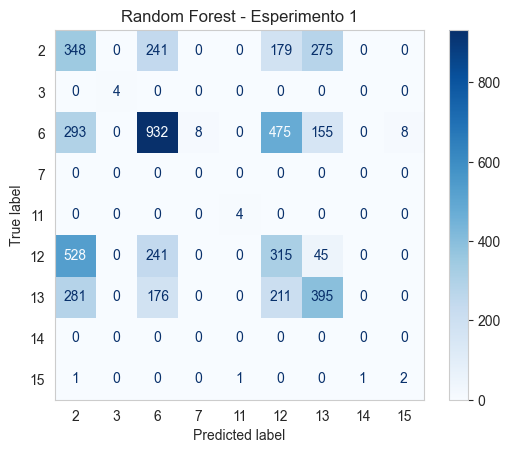

In [14]:

# Supponendo che `y_test` siano le etichette reali e `y_test_pred` le predizioni del modello
# Dopo aver addestrato il modello, ottieni le predizioni
y_test_pred = random_forest_model.predict(X_test_imputed)

# Filtra solo le classi effettivamente presenti nei dati di test e nelle predizioni
labels = np.unique(np.concatenate((y_test_encoded, y_test_pred)))

# Genera la matrice di confusione solo per le classi presenti
cm = confusion_matrix(y_test_encoded, y_test_pred, labels=labels)

# Visualizza la matrice di confusione
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

# Rimuove la griglia
plt.grid(False)

# Mostra la matrice di confusione
plt.title("Random Forest - Esperimento 1")
plt.show()

In [15]:
svm_model = oversampling_multiclass.train_svm_multiclass(X_train_resampled, y_train_resampled, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

Distribuzione delle classi reali nel set di validazione: [   0    0  923    3    0    0 1010    0    0    0    0    0  911  560
    0   20]
Distribuzione delle classi predette nel set di validazione: [   0   99   95    0   80    4    0   34   10    0    5    0    3 3082
    0   15]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.60      0.06      0.11       923
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00      1010
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.33      0.00      0.00       911
          13       0.18      1.00      0.31       560
          15      

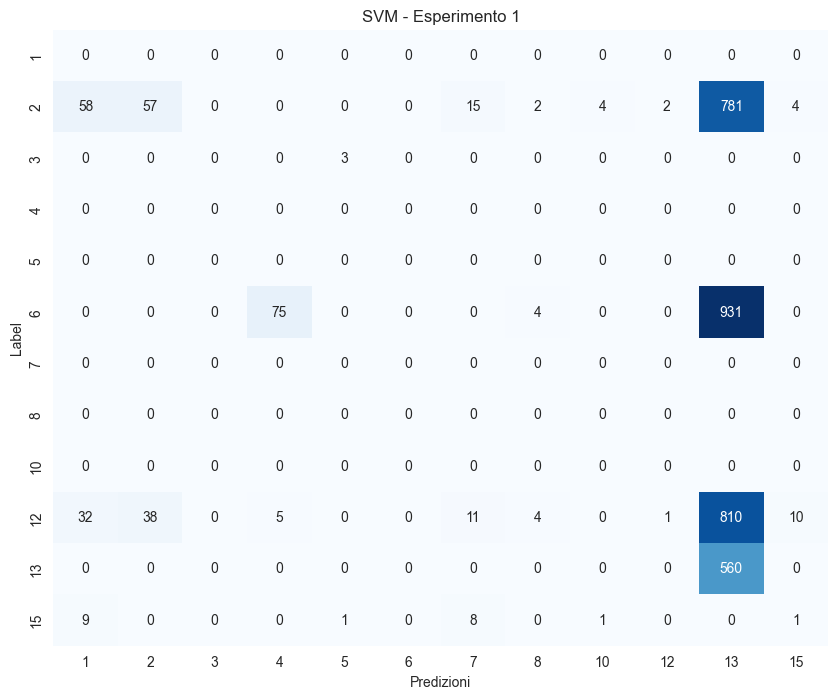

In [16]:
# 1. Effettua le predizioni sul set di convalida
y_pred_multiclass = svm_model.predict(X_val_imputed)

# 2. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded, y_pred_multiclass)))

# 3. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass = confusion_matrix(y_val_encoded, y_pred_multiclass, labels=class_labels)

# 4. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass, annot=True, fmt='d', cmap='Blues',             
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('SVM - Esperimento 1')

# Mostra il grafico
plt.show()

In [17]:
lightgbm_model = oversampling_multiclass.train_lightgbm(X_train_resampled, y_train_resampled, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.31      0.35      0.33       923
           3       1.00      0.00      0.00         3
           5       0.00      1.00      0.00         0
           6       0.34      0.22      0.27      1010
           8       0.00      1.00      0.00         0
           9       0.00      1.00      0.00         0
          12       0.39      0.43      0.41       911
          13       0.43      0.53      0.47       560
          15       1.00      1.00      1.00        20

    accuracy                           0.36      3427
   macro avg       0.38      0.61      0.28      3427
weighted avg       0.36      0.36      0.36      3427

Accuratezza sul set di validazione: 0.3645
Report di classificazione del set di test:
              precision    recall  f1-score   support

           2       0.26      0.40      0.32      1043
           3       1.00      0.75      0.86       

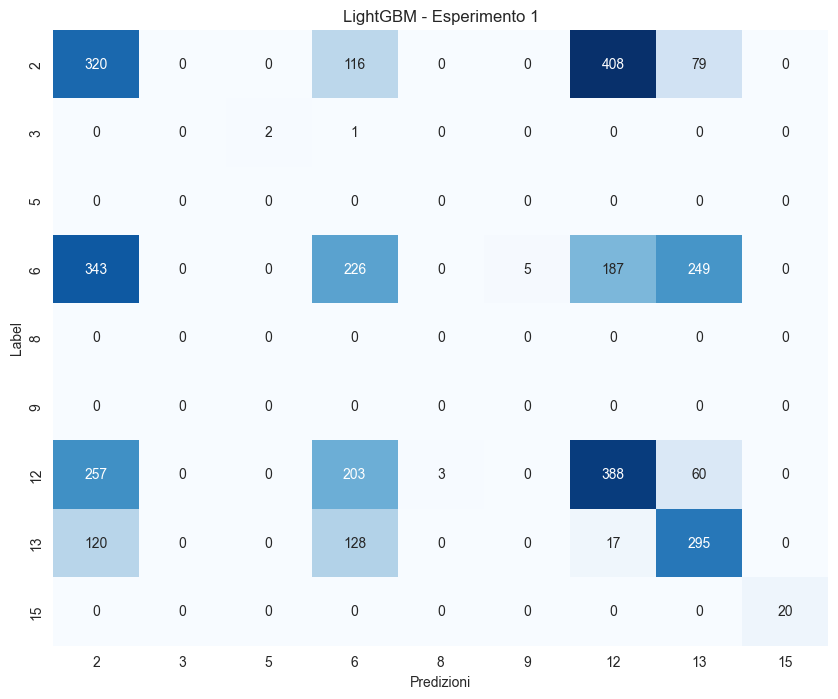

In [18]:

# 1. Effettua le predizioni sul set di convalida (potrebbero essere probabilità per ciascuna classe)
y_pred_proba_multiclass_lightgbm = lightgbm_model.predict(X_val_imputed)

# 2. Se LightGBM restituisce probabilità, ottieni le etichette predette con argmax
y_pred_multiclass_lightgbm = np.argmax(y_pred_proba_multiclass_lightgbm, axis=1)

# 3. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded, y_pred_multiclass_lightgbm)))

# 4. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass_lightgbm = confusion_matrix(y_val_encoded, y_pred_multiclass_lightgbm, labels=class_labels)

# 5. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass_lightgbm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('LightGBM - Esperimento 1')

# Mostra il grafico
plt.show()



## Esperimento 2

Esperimento effettuato prendendo come riferimento alcune features numeriche da “BirdNet”

In [19]:
# Caricare il dataset e applicare lo split
csv_file_path = 'exp1_audio_features.csv'
X_train_imputed_exp1, X_val_imputed_exp1, X_test_imputed_exp1, y_train_encoded_exp1, y_val_encoded_exp1, y_test_encoded_exp1, subclass_encoder_exp1 = oversampling_multiclass.split_dataset(csv_file_path)
# Applicare SMOTE
X_train_resampled_exp1, y_train_resampled_exp1 = oversampling_multiclass.apply_smote_multiclass(X_train_imputed_exp1, y_train_encoded_exp1, 1)
#TRAIN
random_forest_model_exp1 = oversampling_multiclass.train_random_forest_multiclass(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Distribuzione delle classi nel set di training dopo SMOTE:
0     9181
1     9181
2     9181
3     9181
4     9181
5     9181
6     9181
7     9181
8     9181
9     9181
10    9181
11    9181
12    9181
13    9181
14    9181
15    9181
Name: count, dtype: int64
Distribuzione delle classi nel set di addestramento: Counter({0: 9181, 1: 9181, 2: 9181, 3: 9181, 4: 9181, 5: 9181, 6: 9181, 7: 9181, 8: 9181, 9: 9181, 10: 9181, 11: 9181, 12: 9181, 13: 9181, 14: 9181, 15: 9181})
Sottoclassi valide (con almeno 5 campioni): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Distribuzione delle classi nel set di addestramento filtrato: Counter({0: 9181, 1: 9181, 2: 9181, 3: 9181, 4: 9181, 5: 9181, 6: 9181, 7: 9181, 8: 9181, 9: 9181, 10: 9181, 11: 9181, 12: 9181, 13: 9181, 14: 9181, 15: 9181})


Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training on data from index 0 to 14689
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  10%|█         | 1/10 [00:12<01:49, 12.20s/it]

Step 1 completed
Training on data from index 14689 to 29378
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  20%|██        | 2/10 [00:45<03:16, 24.60s/it]

Step 2 completed
Training on data from index 29378 to 44067
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  30%|███       | 3/10 [01:33<04:06, 35.28s/it]

Step 3 completed
Training on data from index 44067 to 58756
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  40%|████      | 4/10 [02:28<04:18, 43.14s/it]

Step 4 completed
Training on data from index 58756 to 73445
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  50%|█████     | 5/10 [03:29<04:07, 49.52s/it]

Step 5 completed
Training on data from index 73445 to 88134
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  60%|██████    | 6/10 [04:39<03:45, 56.36s/it]

Step 6 completed
Training on data from index 88134 to 102823
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  70%|███████   | 7/10 [06:01<03:14, 64.72s/it]

Step 7 completed
Training on data from index 102823 to 117512
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  80%|████████  | 8/10 [07:33<02:27, 73.62s/it]

Step 8 completed
Training on data from index 117512 to 132201
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  90%|█████████ | 9/10 [09:19<01:23, 83.68s/it]

Step 9 completed
Training on data from index 132201 to 146890
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress: 100%|██████████| 10/10 [11:18<00:00, 67.85s/it]

Step 10 completed
Distribuzione delle classi reali nel set di validazione: [   0    0  923    3    0    0 1010    0    0    0    0    0  911  560
    0   20]
Distribuzione delle classi predette nel set di validazione: [   0    0  675    0    0    0 1044    0    0    0    0    0  936  749
    0   23]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.50      0.37      0.42       923
           3       0.00      0.00      0.00         3
           6       0.64      0.66      0.65      1010
          12       0.41      0.42      0.41       911
          13       0.60      0.80      0.69       560
          15       0.87      1.00      0.93        20

    accuracy                           0.54      3427
   macro avg       0.50      0.54      0.52      3427
weighted avg       0.53      0.54      0.53      3427

Accuratezza sul set di validazione: 0.5404
Distribuzione delle classi reali nel set di test: [   0    0 10

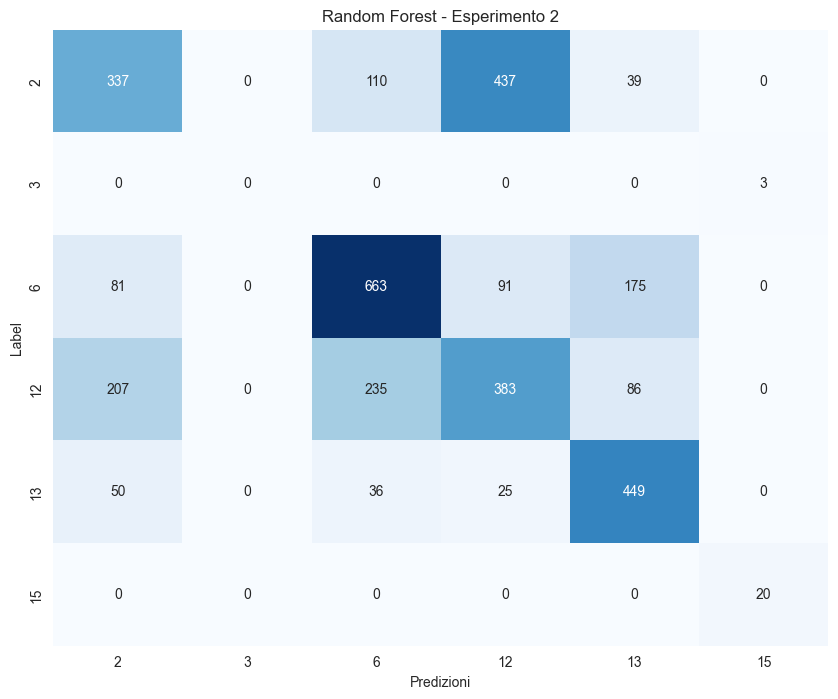

In [20]:
# 1. Effettua le predizioni sul set di convalida
y_pred_multiclass_exp1 = random_forest_model_exp1.predict(X_val_imputed_exp1)

# 2. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded_exp1, y_pred_multiclass_exp1)))

# 3. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass_exp1 = confusion_matrix(y_val_encoded_exp1, y_pred_multiclass_exp1, labels=class_labels)

# 4. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass_exp1, annot=True, fmt='d', cmap='Blues',             
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('Random Forest - Esperimento 2')

# Mostra il grafico
plt.show()

In [21]:
svm_model_exp1 = oversampling_multiclass.train_svm_multiclass(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Distribuzione delle classi reali nel set di validazione: [   0    0  923    3    0    0 1010    0    0    0    0    0  911  560
    0   20]
Distribuzione delle classi predette nel set di validazione: [   1    0  553    3   12    0  164   14   12    2   88    2  632 1941
    0    3]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.46      0.28      0.35       923
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         0
           6       0.55      0.09      0.15      1010
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.36      0.25      0.29       911
          13      

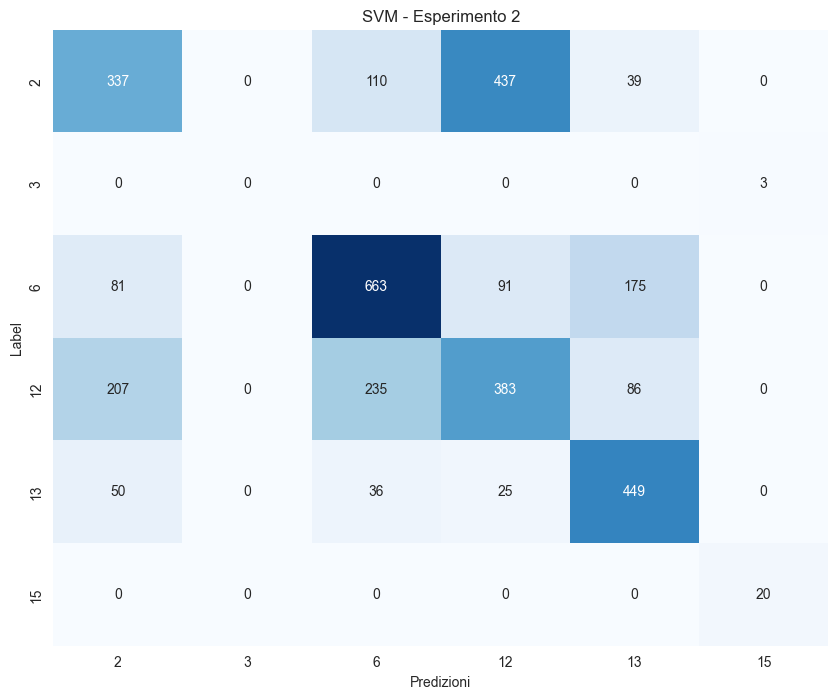

In [22]:

# 1. Effettua le predizioni sul set di convalida
y_pred_multiclass_exp1_svm = svm_model_exp1.predict(X_val_imputed_exp1)

# 2. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded_exp1, y_pred_multiclass_exp1)))

# 3. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass = confusion_matrix(y_val_encoded_exp1, y_pred_multiclass_exp1, labels=class_labels)

# 4. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass, annot=True, fmt='d', cmap='Blues',             
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('SVM - Esperimento 2')

# Mostra il grafico
plt.show()

In [23]:
lightgbm_model_exp1 = oversampling_multiclass.train_lightgbm(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.54      0.46      0.50       923
           3       1.00      0.67      0.80         3
           6       0.62      0.63      0.63      1010
          10       0.00      1.00      0.00         0
          12       0.46      0.46      0.46       911
          13       0.62      0.75      0.68       560
          15       1.00      0.25      0.40        20

    accuracy                           0.56      3427
   macro avg       0.60      0.60      0.49      3427
weighted avg       0.56      0.56      0.55      3427

Accuratezza sul set di validazione: 0.5579
Report di classificazione del set di test:
              precision    recall  f1-score   support

           2       0.53      0.67      0.59      1043
           3       0.75      0.75      0.75         4
           6       0.70      0.64      0.67      1871
          11       0.75      0.75      0.75       

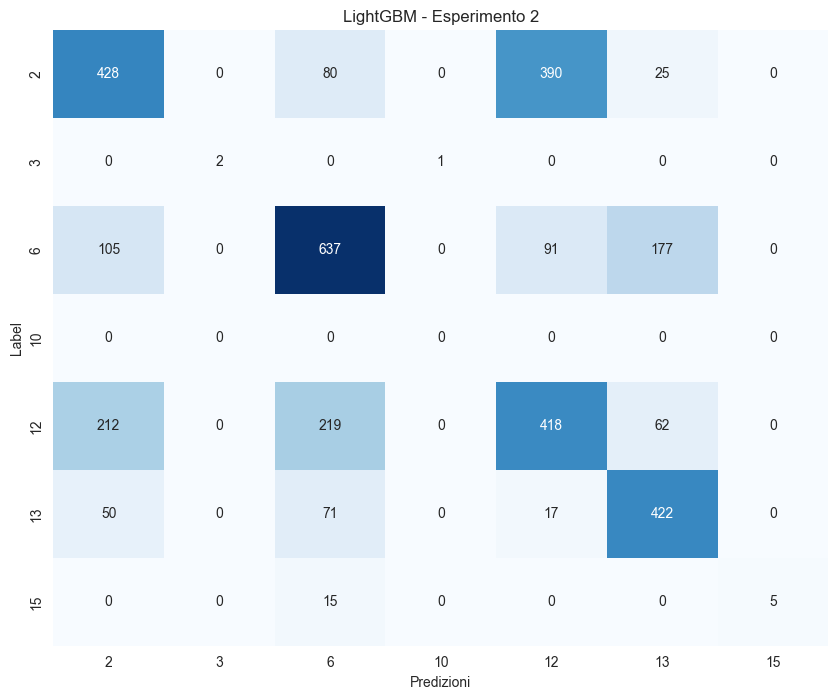

In [24]:
# 1. Effettua le predizioni sul set di convalida (potrebbero essere probabilità per ciascuna classe)
y_pred_proba_multiclass_lightgbm = lightgbm_model_exp1.predict(X_val_imputed_exp1)

# 2. Se LightGBM restituisce probabilità, ottieni le etichette predette con argmax
y_pred_multiclass_lightgbm = np.argmax(y_pred_proba_multiclass_lightgbm, axis=1)

# 3. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded_exp1, y_pred_multiclass_lightgbm)))

# 4. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass_lightgbm = confusion_matrix(y_val_encoded_exp1, y_pred_multiclass_lightgbm, labels=class_labels)

# 5. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass_lightgbm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('LightGBM - Esperimento 2')

# Mostra il grafico
plt.show()

## Esperimento 3

Esperimento effettuato prendendo come riferimento features numeriche da "A Survey on Audio Feature Extraction for Automatic Music Genre Classification" di Dhamodaran et al.

In [25]:
# Caricare il dataset e applicare lo split
csv_file_path = 'exp2_audio_features.csv'
X_train_imputed_exp2, X_val_imputed_exp2, X_test_imputed_exp2, y_train_encoded_exp2, y_val_encoded_exp2, y_test_encoded_exp2, subclass_encoder_exp2 = oversampling_multiclass.split_dataset(csv_file_path)
# Applicare SMOTE
X_train_resampled_exp2, y_train_resampled_exp2 = oversampling_multiclass.apply_smote_multiclass(X_train_imputed_exp2, y_train_encoded_exp2, 1)
#TRAIN
random_forest_model_exp2 = oversampling_multiclass.train_random_forest_multiclass(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Distribuzione delle classi nel set di training dopo SMOTE:
0     9181
1     9181
2     9181
3     9181
4     9181
5     9181
6     9181
7     9181
8     9181
9     9181
10    9181
11    9181
12    9181
13    9181
14    9181
15    9181
Name: count, dtype: int64
Distribuzione delle classi nel set di addestramento: Counter({0: 9181, 1: 9181, 2: 9181, 3: 9181, 4: 9181, 5: 9181, 6: 9181, 7: 9181, 8: 9181, 9: 9181, 10: 9181, 11: 9181, 12: 9181, 13: 9181, 14: 9181, 15: 9181})
Sottoclassi valide (con almeno 5 campioni): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Distribuzione delle classi nel set di addestramento filtrato: Counter({0: 9181, 1: 9181, 2: 9181, 3: 9181, 4: 9181, 5: 9181, 6: 9181, 7: 9181, 8: 9181, 9: 9181, 10: 9181, 11: 9181, 12: 9181, 13: 9181, 14: 9181, 15: 9181})


Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training on data from index 0 to 14689
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  10%|█         | 1/10 [00:14<02:08, 14.28s/it]

Step 1 completed
Training on data from index 14689 to 29378
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  20%|██        | 2/10 [00:49<03:30, 26.37s/it]

Step 2 completed
Training on data from index 29378 to 44067
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  30%|███       | 3/10 [01:37<04:16, 36.58s/it]

Step 3 completed
Training on data from index 44067 to 58756
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  40%|████      | 4/10 [02:36<04:31, 45.31s/it]

Step 4 completed
Training on data from index 58756 to 73445
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  50%|█████     | 5/10 [03:43<04:24, 52.96s/it]

Step 5 completed
Training on data from index 73445 to 88134
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  60%|██████    | 6/10 [04:57<04:00, 60.20s/it]

Step 6 completed
Training on data from index 88134 to 102823
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  70%|███████   | 7/10 [06:25<03:27, 69.25s/it]

Step 7 completed
Training on data from index 102823 to 117512
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  80%|████████  | 8/10 [08:03<02:37, 78.62s/it]

Step 8 completed
Training on data from index 117512 to 132201
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress:  90%|█████████ | 9/10 [09:48<01:26, 86.90s/it]

Step 9 completed
Training on data from index 132201 to 146890
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training Progress: 100%|██████████| 10/10 [11:44<00:00, 70.47s/it]

Step 10 completed
Distribuzione delle classi reali nel set di validazione: [   0    0  923    3    0    0 1010    0    0    0    0    0  911  560
    0   20]
Distribuzione delle classi predette nel set di validazione: [   0    0  571    0    0    0 1034    0    0    0    2    1 1002  810
    0    7]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.51      0.32      0.39       923
           3       0.00      0.00      0.00         3
           6       0.60      0.61      0.61      1010
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.41      0.45      0.43       911
          13       0.55      0.80      0.65       560
          15       0.71      0.25      0.37        20

    accuracy                           0.52      3427
   macro avg       0.35      0.30      0.31      3427
weighted avg       0.52      0.52      0.51      3427

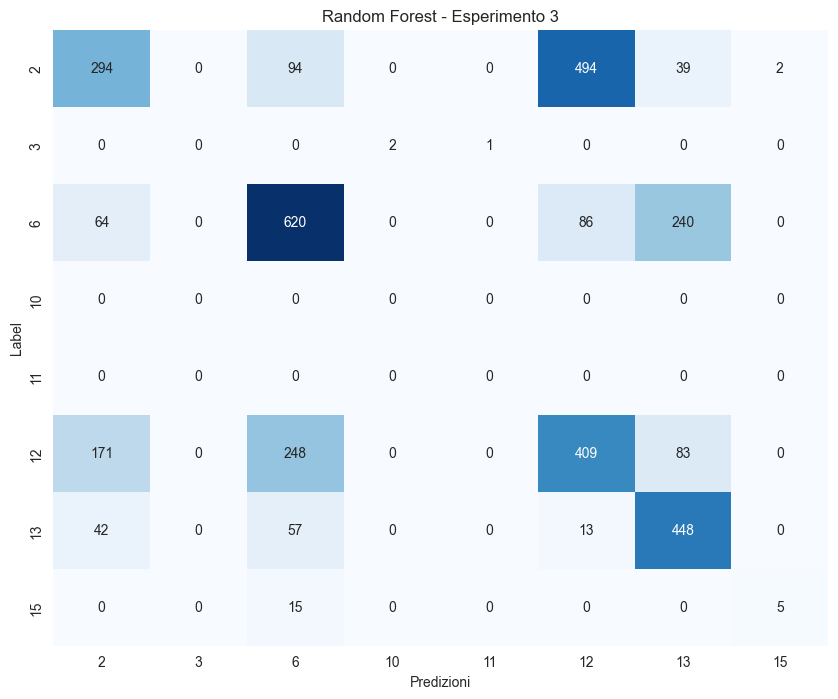

In [26]:
# 1. Effettua le predizioni sul set di convalida
y_pred_multiclass_exp2 = random_forest_model_exp2.predict(X_val_imputed_exp2)

# 2. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded_exp2, y_pred_multiclass_exp2)))

# 3. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass_exp2 = confusion_matrix(y_val_encoded_exp2, y_pred_multiclass_exp2, labels=class_labels)

# 4. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass_exp2, annot=True, fmt='d', cmap='Blues',             
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('Random Forest - Esperimento 3')

# Mostra il grafico
plt.show()

In [27]:
svm_model_exp2 = oversampling_multiclass.train_svm_multiclass(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Distribuzione delle classi reali nel set di validazione: [   0    0  923    3    0    0 1010    0    0    0    0    0  911  560
    0   20]
Distribuzione delle classi predette nel set di validazione: [   0    0  691    0    1    3  658    1    3   15    0    3  865 1180
    0    7]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.23      0.17      0.20       923
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.46      0.30      0.37      1010
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.33      0.32      0.33       911
          13       0.38      0.80      0.51       560
          15      

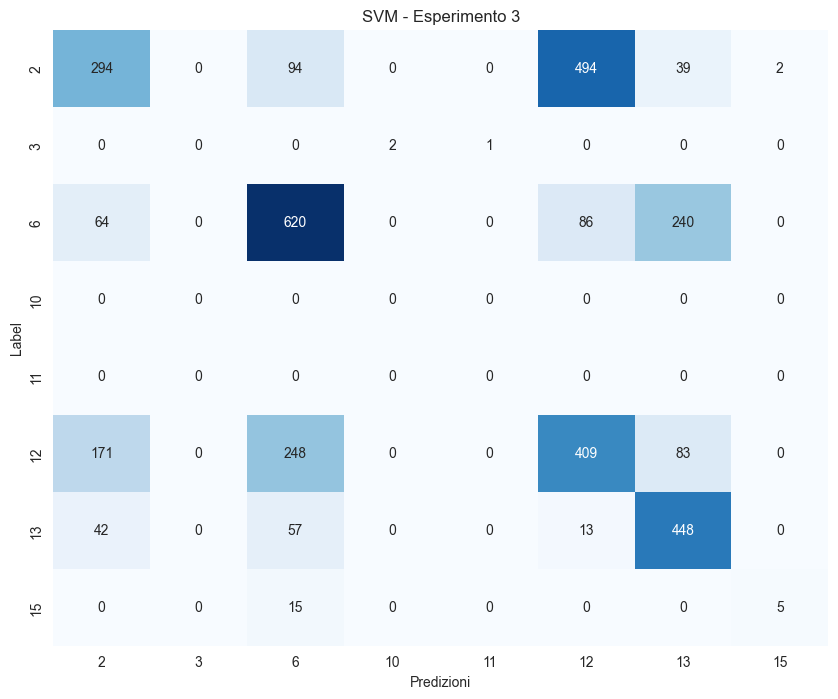

In [28]:
# 1. Effettua le predizioni sul set di convalida
y_pred_multiclass_exp2_svm = svm_model_exp2.predict(X_val_imputed_exp2)

# 2. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded_exp2, y_pred_multiclass_exp2)))

# 3. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass = confusion_matrix(y_val_encoded_exp2, y_pred_multiclass_exp2, labels=class_labels)

# 4. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass, annot=True, fmt='d', cmap='Blues',             
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('SVM - Esperimento 3')

# Mostra il grafico
plt.show()

In [29]:
lightgbm_model_exp2 = oversampling_multiclass.train_lightgbm(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           2       0.48      0.37      0.42       923
           3       1.00      1.00      1.00         3
           6       0.62      0.62      0.62      1010
          11       0.00      1.00      0.00         0
          12       0.43      0.47      0.45       911
          13       0.58      0.69      0.63       560
          15       1.00      0.55      0.71        20

    accuracy                           0.53      3427
   macro avg       0.59      0.67      0.55      3427
weighted avg       0.53      0.53      0.52      3427

Accuratezza sul set di validazione: 0.5279
Report di classificazione del set di test:
              precision    recall  f1-score   support

           2       0.52      0.68      0.59      1043
           3       0.75      0.75      0.75         4
           6       0.72      0.68      0.70      1871
           8       0.00      1.00      0.00       

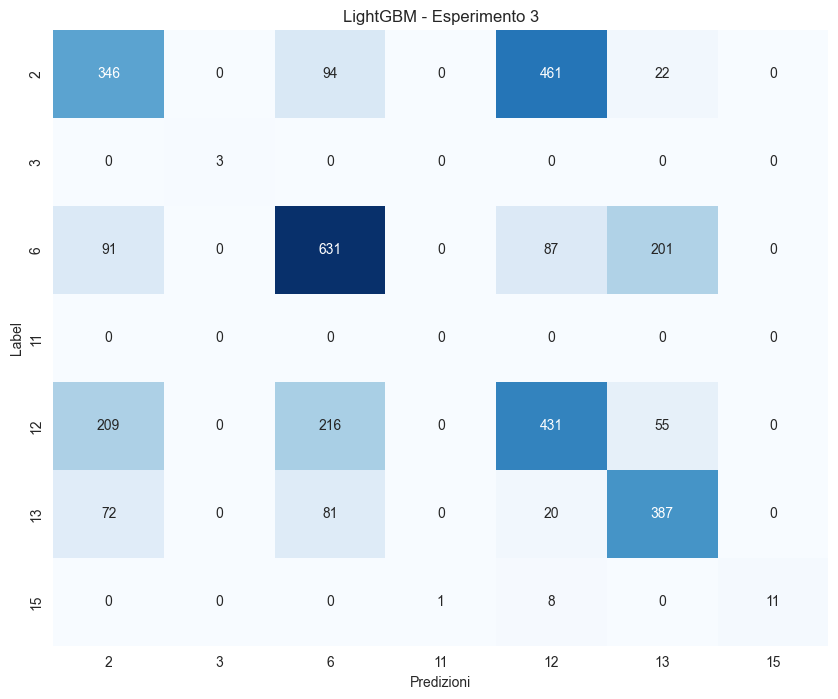

In [30]:
# 1. Effettua le predizioni sul set di convalida (potrebbero essere probabilità per ciascuna classe)
y_pred_proba_multiclass_lightgbm = lightgbm_model_exp2.predict(X_val_imputed_exp2)

# 2. Se LightGBM restituisce probabilità, ottieni le etichette predette con argmax
y_pred_multiclass_lightgbm = np.argmax(y_pred_proba_multiclass_lightgbm, axis=1)

# 3. Filtra solo le classi effettivamente presenti nei dati di validazione e nelle predizioni
class_labels = np.unique(np.concatenate((y_val_encoded_exp2, y_pred_multiclass_lightgbm)))

# 4. Calcola la matrice di confusione solo per le classi presenti
cm_multiclass_lightgbm = confusion_matrix(y_val_encoded_exp2, y_pred_multiclass_lightgbm, labels=class_labels)

# 5. Visualizza la matrice di confusione senza griglia
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass_lightgbm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels, 
            cbar=False)  # Disabilita la barra colore se non necessaria

# Rimuove la griglia
plt.grid(False)

# Aggiunge etichette e titolo
plt.xlabel('Predizioni')
plt.ylabel('Label')
plt.title('LightGBM - Esperimento 3')

# Mostra il grafico
plt.show()